# Autoencoder study #2
<hr style='height:5px'>
kwanki.ahn<br>
2019/06/01<br>
ref : https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/
<hr style='height:5px'>

In [2]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

In [3]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

In [4]:
x_train.shape, x_test.shape
# ((60000, 28, 28), (10000, 28, 28))

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)
# ((60000, 784), (10000, 784))

((60000, 784), (10000, 784))

In [6]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Compression factor: 24.5
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s - loss: 0.2762 - val_loss: 0.1932
Epoch 2/30
60000/60000 [==============================] - 2s - loss: 0.1733 - val_loss: 0.1553
Epoch 3/30
60000/60000 [==============================] - 2s - loss: 0.1453 - val_loss: 0.1345
Epoch 4/30
60000/60000 [==============================] - 2s - loss: 0.1292 - val_loss: 0.1218
Epoch 5/30
60000/60000 [==============================] - 2s - loss: 0.1109 - val_loss: 0.1069
Epoch 7/30
60000/60000 [==============================] - 2s - loss: 0.1058 - val_loss: 0.1027
Epoch 8/30
60000/60000 [==============================] - 2s - loss: 0.1021 - val_loss: 0.0998
Epoch 9/30
60000/60000 [==============================] - 2s - loss: 0.0995 - val_loss: 0.0973
Epoch 10/30
60000/60000 [==============================] - 2s - loss: 0.0976 - val_loss: 0.0957
Epoch 11/30
60000/60000 [=====================

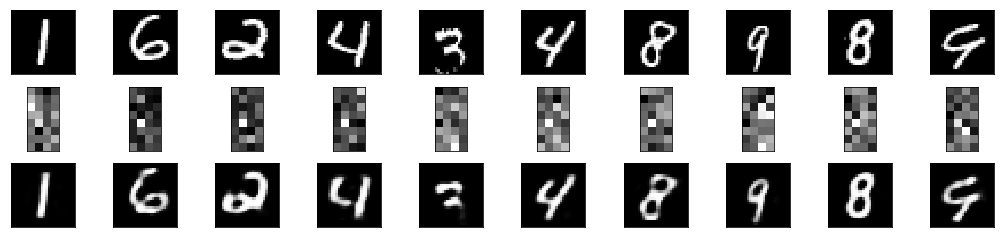

In [10]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()